In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import BlackScholes as bs
import ImpliedDrift as iD
import time
import Quintic

from matplotlib import cm

In [2]:
dates = np.array(["24_01_23.csv", "25_01_23.csv", "26_01_23.csv", "27_01_23.csv",
                  "30_01_23.csv", "06_02_23.csv", "13_02_23.csv", "21_02_23.csv"])

spot = np.array(pd.read_csv("spot.csv").Spot).flatten()

rho, H, eps, a0, a1, a3, a5 = np.array(pd.read_csv("quintic_stability_parameters.csv").iloc[0])
a_k = np.array([a0, a1, a3, a5])

moneyness = np.array([80.0,90.0,95.0,97.5,100.0,102.5,105.0,110.0,120.0])

In [3]:
nr = 30; n_dates = len(dates); nc = len(moneyness);
err = np.zeros(n_dates); N = 12500; n = 3650;

for i in range(n_dates):
    
    iv = np.zeros([nr,nc])
    
    data = pd.read_csv(dates[i])
    maturities = np.array(data['Tenor']).flatten()
    IV = np.array(data.drop(columns = ['Date','Tenor']))/100.
    
    index = i + 1
    
    S0 = spot[index]; K = moneyness*S0/100;

    t = time.time()
    
    np.random.seed(index)
    w = np.concatenate((np.zeros([1,N*2]), Quintic.dW(n, N)))
    
    T = maturities[-1]; steps = np.ceil(n*maturities/T).astype(int)

    P = Quintic.global_reduction(rho, H, eps, T, a_k, S0, K, n, N, w, steps, maturities, index)

    for j in range(nr):
        T_aux = maturities[j]
        r = iD.r(T_aux, index); q = iD.q(T_aux, index);
        iv[j,:] = bs.BSImpliedVol(S0, K, T_aux, r, q, P[j], Option_type = 1, toll = 1e-5)

    print(f'Execution time: {time.time()-t: .2f}s')

    err[i] = np.mean(abs(IV-iv)/IV)*100

    print(f"Relative mean error: {err[i]:.4f}%\n")

Execution time:  58.93s
Relative mean error: 2.2226%

Execution time:  45.36s
Relative mean error: 2.7234%

Execution time:  40.26s
Relative mean error: 2.9135%

Execution time:  39.67s
Relative mean error: 2.3555%

Execution time:  47.09s
Relative mean error: 2.3735%

Execution time:  44.64s
Relative mean error: 2.2389%

Execution time:  46.18s
Relative mean error: 2.5612%

Execution time:  43.74s
Relative mean error: 3.8596%



Text(0.5, 1.0, 'Mean percentage error comparison')

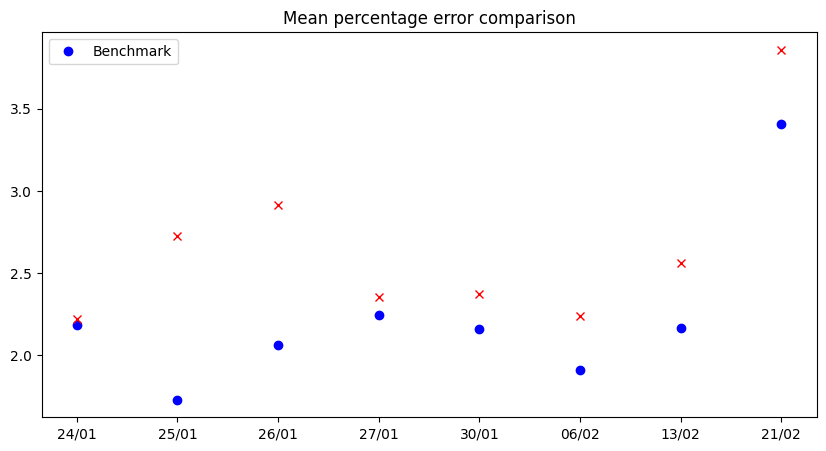

In [13]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

best_err = np.array([2.18334018, 1.72959356, 2.06420429, 2.24294165, 2.1601649 , 1.90846828, 2.16632274, 3.40996862])
plt.plot(np.array(["24/01", "25/01", "26/01", "27/01", "30/01", "06/02", "13/02", "21/02"]), best_err, 'bo')
plt.plot(np.array(["24/01", "25/01", "26/01", "27/01", "30/01", "06/02", "13/02", "21/02"]), err, 'rx')
plt.legend(["Benchmark"])
plt.title("Mean percentage error comparison")

In [5]:
err

array([2.22258164, 2.72339899, 2.91347479, 2.35551225, 2.37351962,
       2.23893364, 2.56115475, 3.85958783])